# Исследование по прогнозу продаж видеоигр на 2017 год

Заказчик интернет-магазин, который продаёт по всему миру компьютерные игры. На исследование представлены данные из открытых источников за период до 2016 года. В них представлены исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 

Необходимо выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017-й год.

# Исследование закономерностей в успешности видеоигр


# Изучение общей информации в представленном массиве данных. 

### Изучение общей информации в представленном массиве данных. 

#### Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import warnings
from scipy import stats as st
from scipy.stats import levene
import os

#### Функция вывода таблиц в ряд

In [2]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>']))):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h3 style="text-align: center;">{title}</h3>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)


#### Извлечение и первичный анализ данных

In [3]:
pth1 = 'C:\Dataset\games.csv'
pth2 = '/datasets/games.csv'
if os.path.exists(pth1):
    games_info = pd.read_csv(pth1)
elif os.path.exists(pth2):
    games_info = pd.read_csv(pth2)
else:
    print("Нужно проверьте правильность пути к датасету")

pd.set_option('display.max_columns', 50)


In [4]:
backup = games_info.copy(deep=True)
# на всякий случай пусть будет копия

In [5]:
games_info.info()
# в представленных данных имеется значительное количество пропусков. Около половины данных не содержат 
# сведений о возрастном рейтинге, оценке критиков или пользовательской оценке

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
games_info.head(20)
# в датасете представлены данные о видеоиграх, вышедших более чем за 30 лет на различных игровых платформах

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [7]:
games_info.corr()
# согласно представленным данным в значительной степени между собой коррелируют продажи в разных регионах

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
Year_of_Release,1.000000,-0.092500,0.003978,-0.168366,0.037820,0.011411
NA_sales,-0.092500,1.000000,0.765335,0.449594,0.638649,0.240755
EU_sales,0.003978,0.765335,1.000000,0.435061,0.722792,0.220752
JP_sales,-0.168366,0.449594,0.435061,1.000000,0.291089,0.152593
Other_sales,0.037820,0.638649,0.722792,0.291089,1.000000,0.198554
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,1.000000


Гистограммы по численным значениям, представленным в данных


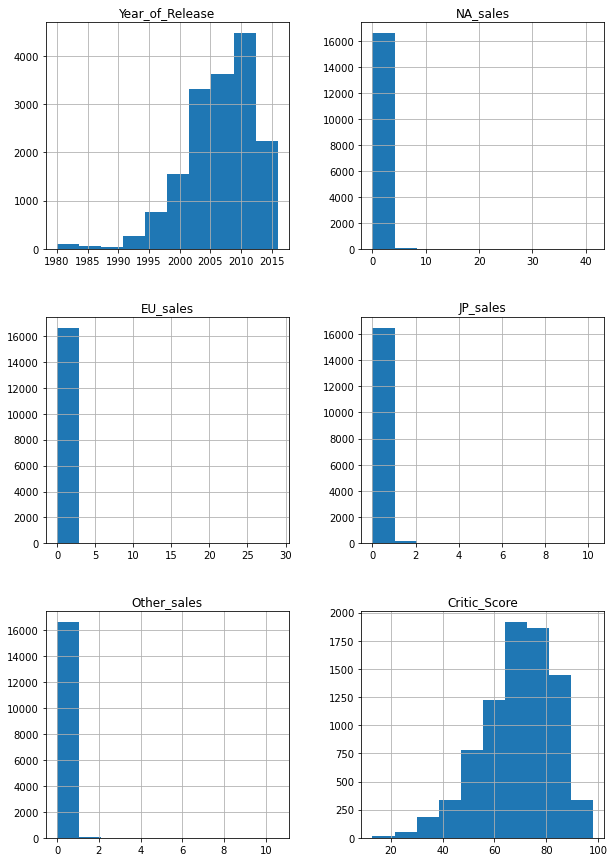

In [8]:
backup.hist(figsize=(10, 15))
print('Гистограммы по численным значениям, представленным в данных')
# в 2000-х заметин существенный рост выпуска видеоигр, который достиг своего пика в 10-х годах

### Первичная обработка данных

#### Приведение названий столбцов к нижнему регистру

In [9]:
games_info.columns = games_info.columns.str.lower()
games_info.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Удаление пропусков в столбце с данными о годе выпуска видеоигры, их преобразование в int. Поскольку содержится только цифровые обозначения года к datetime приводить нецелесообразно.

In [10]:
games_info['year_of_release'].unique()
# в данных ожидаемо имеются пропуски. Представлены данные об играх, вышедших с 1980 по 2016 годы.

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [11]:
games_info = games_info.dropna(subset=['year_of_release'])
games_info['year_of_release'].isna().sum()
# пропуски удалены, поскольку данные о дате выхода игры не удастся восполнить без сторонних источников информации
print('Количество пропусков в данных о жанрах видеоигр:', games_info['year_of_release'].isna().sum())

Количество пропусков в данных о жанрах видеоигр: 0


In [12]:
games_info['year_of_release'] = games_info['year_of_release'].astype(int)
#games_info.info()
#games_info.head()
# тип данных в столбце с датой заменен на int

#### Стоит проверить столбец с жанрами видеоигр на предмет пропусков и дубликатов.

In [13]:
games_info['genre'].unique()
# дубликатов нет, только пропуски

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [14]:
games_info = games_info.dropna(subset=['genre'])
games_info['genre'].isna().sum()
# пропуски удалены, поскольку жанровую принадлежность не восстановить без внешних источников информации, 
# где содержится описание видеоигры
print('Количество пропусков в данных о жанрах видеоигр:', games_info['genre'].isna().sum())

Количество пропусков в данных о жанрах видеоигр: 0


#### Посмотрим с какой периодичностью меняются платформы, чтобы можно было отбросить данные, в зависимости от даты выпуска видеоигры

Длительность поддержки платформ для видеоигр


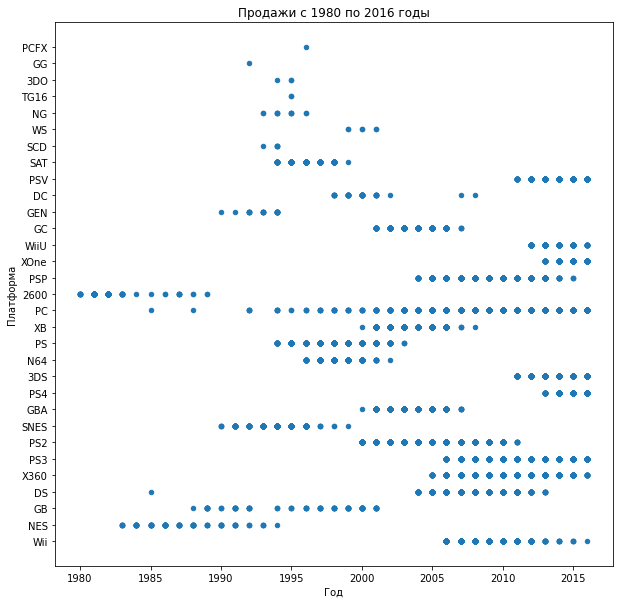

In [15]:
games_info.plot(x='year_of_release', y='platform', kind='scatter', figsize=(10, 10)) 
print('Длительность поддержки платформ для видеоигр')
# наиболее длинный цикл поддержки платформы ожидаемо показывает PC, поскольку он не является узкофункциональной платформой
# из игровых приставок, которые поддерживаются на до 2016 года наиболее длительный период эксплуатации показывает
# X360. Таким образом кажется разумным рассматривать перспективы популярности видеоигр, которые выходят в 2017 году

plt.title('Продажи с 1980 по 2016 годы')
plt.xlabel('Год')
plt.ylabel('Платформа')
plt.show()

In [16]:
warnings.simplefilter("ignore")
time_platform = []
time_platform = pd.DataFrame(columns=['platform', 'years_on_market', 'start_platform'])
for platform in pd.Series(games_info['platform'].unique()).sort_values():
    x = games_info[games_info['platform'] == platform]
    sum_year = x['year_of_release'].max() - x['year_of_release'].min()
    time_platform = time_platform.append({'platform' : platform, 'years_on_market' : sum_year, 'start_platform' : \
                                     x['year_of_release'].min()}, ignore_index=True)

# подсчитаем, как долго к платформам выходили новые игры

Продолжительность поддержки платформы <a id='time_id'></a>

In [17]:
display(time_platform)

,platform,years_on_market,start_platform
0,2600,9,1980
1,3DO,1,1994
2,3DS,5,2011
3,DC,10,1998
4,DS,28,1985
5,GB,13,1988
6,GBA,7,2000
7,GC,6,2001
8,GEN,4,1990
9,GG,0,1992


#### Далее исправим данные с пользовательским рейтингом. Неожиданно они имеют тип данных object вместо float.

In [18]:
games_info['user_score'].unique()
# ожидаемо большинство данных можно перевести во float, также в данных имеется артефакт'tbd'

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [19]:
games_info['user_score'].value_counts()
# tbd похоже на заклушку, пока игра не наберет достаточного количества оценок пользователей для формирования рейтинга 

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [20]:
games_info[games_info['user_score'] == 'tbd'].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E
1048,Imagine: Teacher,DS,2008,Simulation,0.70,0.82,0.00,0.19,NaN,tbd,E


In [21]:
games_info = games_info.replace({'user_score' : 'tbd'}, -1)
games_info['user_score'] = games_info['user_score'].astype(float, errors='ignore')
games_info['user_score'].unique()
# меняем заглушку на ту, с которой проще работать

array([ 8. ,  nan,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5, -1. ,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,
        4.9,  4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,
        4.4,  4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,
        2.5,  1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,
        3.8,  0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,
        2.3,  0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

#### Замена в пропусках с пользовательским рейтингом заглушкой

In [22]:
games_info['user_score'] = games_info['user_score'].fillna(-2)
print('Количество пропусков в данных об оценке пользователей:', games_info['user_score'].isna().sum())

# плюс одна заглушка. На всякий случай взял другое значение, если вдруг понадобится разделить пропуски и tbd

Количество пропусков в данных об оценке пользователей: 0


#### Аналогично чистим данные по оценкам критиков

In [23]:
print('Количество пропусков в данных об оценке критиков:', games_info['critic_score'].isna().sum())

Количество пропусков в данных об оценке критиков: 8461


In [24]:
games_info['critic_score'] = games_info['critic_score'].fillna(-2)
print('Количество пропусков в данных об оценке пользователей:', games_info['critic_score'].isna().sum())

Количество пропусков в данных об оценке пользователей: 0


#### Осталось проверить, что с возрастным рейтингом игр и удалить пропуски, если они есть. Равноценно заполнить их не удастся

In [25]:
games_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


In [26]:
games_info['rating'].unique()
# неявных дубликатов нет. Похоже, что пользовательский рейтинг взят в рамках североамериканского континента

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [27]:
games_info['rating'] = games_info['rating'].fillna('NA')
print('Количество пропусков в данных об оценке пользователей:', games_info['rating'].isna().sum())
# кажется разумным принять пропуски за отсутствие рейтинга у данной игры

Количество пропусков в данных об оценке пользователей: 0


In [28]:
games_info.duplicated().value_counts()
# дубликаты таже отсутствуют

False    16444
dtype: int64

#### Добавляем столбец с общими продажами

In [29]:
games_info['all_sales'] = games_info[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
# добавлен столбец с суммарным значением продаж

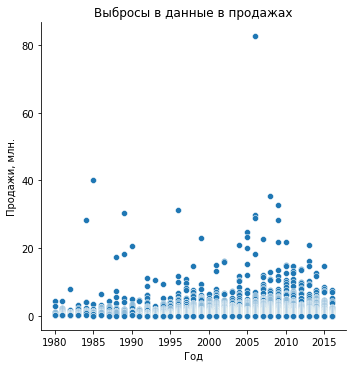

In [30]:
sns.relplot(x='year_of_release', y='all_sales', data=games_info)
plt.title('Выбросы в данные в продажах')
plt.xlabel('Год')
plt.ylabel('Продажи, млн.')
plt.show()

In [31]:
games_info.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-2.0,-2.0,NA,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-2.0,-2.0,NA,31.38


**Вывод:**

данные похожи на выгрузку из базы данных портала с рейтингом видеоигр. В большинстве случаев пропуски скорее всего имеют технический характер. tbd скорее всего свидетельствует о том, что не набралось достаточное количество оценок пользователей для формирования рейтинга.

### Исследовательский анализ данных

#### Посмотрим на динамику выпуска игр относительно временной шкалы

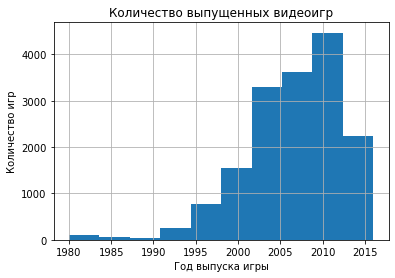

In [32]:
games_info['year_of_release'].hist()
plt.title('Количество выпущенных видеоигр')
plt.xlabel('Год выпуска игры')
plt.ylabel("Количество игр");
plt.show()

**Вывод:**

после 2000 года наблюдается резкий рост выпуска компьютерных игр, поэтому данные за более ранний период не так важны.

#### Самое время оценить продажи на различных платформах

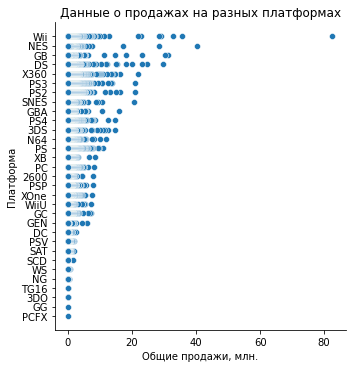

In [33]:
sns.relplot(x='all_sales', y='platform', data=games_info)
# выброс в 80 млн.копий выглядит слишком подозрительно. Открытые данные подтвердили цифру, но есть нюанс
# игра продавалась в комплекте с игровой консолью, так что это значение точно не стоит учитывать

plt.title('Данные о продажах на разных платформах')
plt.xlabel('Общие продажи, млн.')
plt.ylabel("Платформа");
plt.show()

In [34]:
games_info = games_info[games_info['name'] != 'wii sports']
# минус аномальный выброс по продажам

In [35]:
print('Продажи на всех платформах:\n', games_info.groupby('platform')['all_sales'].sum().sort_values(ascending=False), 
      sep='')

Продажи на всех платформах:
platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: all_sales, dtype: float64


#### Посмотрим на динамику продаж на различных платформ

In [36]:
name_top_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS4', 'PS', 'XB']
games_platform = games_info.query('platform in @name_top_platform')
games_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


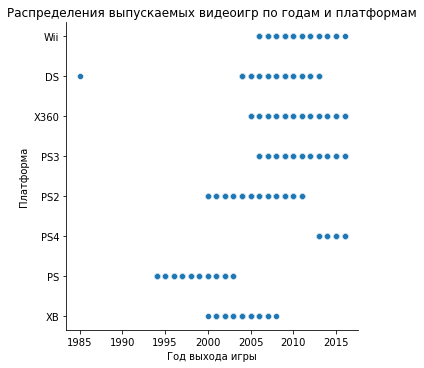

In [37]:
sns.relplot(x='year_of_release', y='platform', data=games_platform)

plt.title('Распределения выпускаемых видеоигр по годам и платформам')
plt.xlabel('Год выхода игры')
plt.ylabel("Платформа");
plt.show()

Среднее время поддержки игровой платформы около 11.0 лет


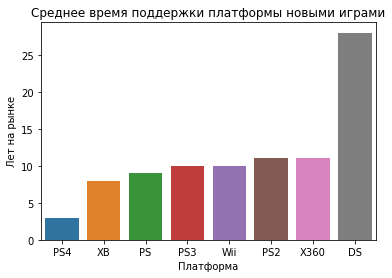

In [38]:
time_platform = []
time_platform = pd.DataFrame(columns=['platform', 'years_on_market', 'start_platform'])

for platform in pd.Series(games_platform['platform'].unique()).sort_values():
    x = games_platform[games_platform['platform'] == platform]
    sum_year = x['year_of_release'].max() - x['year_of_release'].min()
    time_platform = time_platform.append({'platform' : platform, 'years_on_market' : sum_year, 'start_platform' : \
                                     x['year_of_release'].min()}, ignore_index=True)
time_platform = time_platform.sort_values('years_on_market', inplace=False)

sns.barplot(x='platform', y='years_on_market', data=time_platform)
print('Среднее время поддержки игровой платформы около', time_platform['years_on_market'].mean().round(0), 'лет')

plt.title('Среднее время поддержки платформы новыми играми')
plt.xlabel('Платформа')
plt.ylabel("Лет на рынке");
plt.show()

**Вывод:**<a id='year_id'></a>

среднее время поддержки игровой платформы с максимальными показателями продаж - 11 лет. При этом нужно учесть то, что некоторые игровые платформы находятся на рынке значительно меньшее время, нежели среднее время поддержки игровой платформы

#### В контексте 11 летнего срока функционирования игровой платформы, взгляним на динамику выхода игр, а также общие продажи<a id='section_id'></a>

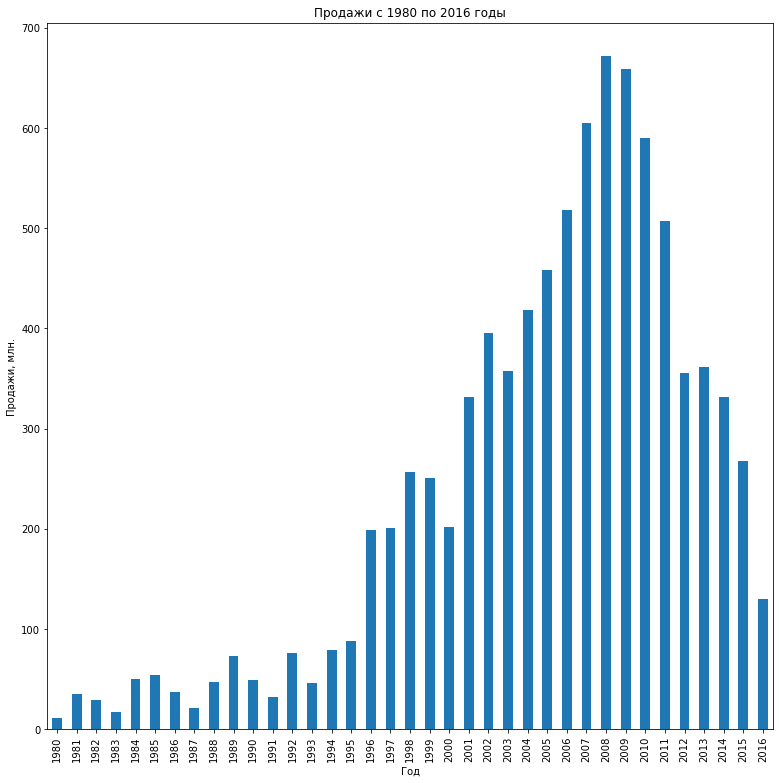

In [39]:
plt.figure(figsize = (13, 13))
top_sales_info = games_info.groupby('year_of_release')['all_sales'].sum()

top_sales_info.plot.bar()

plt.title('Продажи с 1980 по 2016 годы')
plt.xlabel('Год')
plt.ylabel('Продажи, млн.')
plt.show()

# продажи видеоигр росли вплоть до 2008 года, а потом неуклонно падали. Подозреваю, что это физические продажи видеоигр
# и в таком случае пора прикрывать лавочку. Год к году почти двукратное падение продаж

**Вывод:**

в контексте падения продаж начиная с 2008 года, стабилизации количества выпускаемых игр после 2012 года и средним периодом существования консоли в 11 лет для целей прогнозирования продаж в 2017 году будем рассматривать трехлетний период. 

#### Сформирую датафрейм по выбранным параметрам

In [40]:
games_info_target = games_info[games_info['year_of_release'] > 2013]

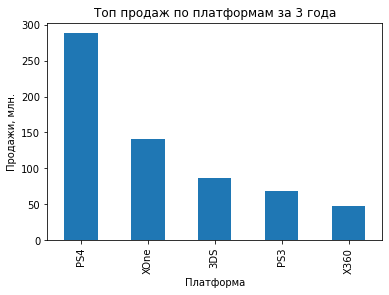

In [41]:
top_platform_info = games_info_target.groupby('platform')['all_sales'].sum().sort_values(ascending=False)
top_platform_info.head().plot.bar()
plt.title('Топ продаж по платформам за 3 года')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн.')
plt.show()

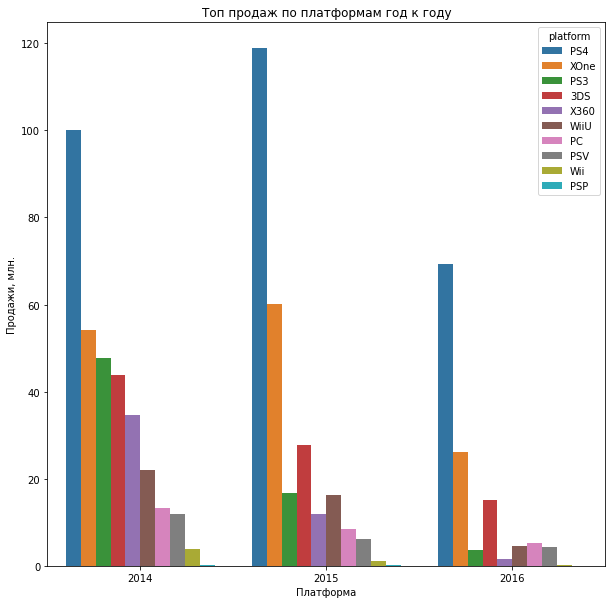

In [42]:
sale_for_year = []
sale_for_year = pd.DataFrame(columns=['year_of_release', 'all_sales', 'platform'])
for year in pd.Series(games_info_target['year_of_release'].unique()).sort_values():
    for platform in pd.Series(games_info_target['platform'].unique()).sort_values():
        x = games_info_target[(games_info_target['year_of_release'] == year) 
                              & (games_info_target['platform'] == platform)]
        sum_sale = x['all_sales'].sum()
        sale_for_year = sale_for_year.append({'all_sales' : sum_sale, 'year_of_release' : year, 
                                             'platform' : platform}, ignore_index=True)
        
sale_for_year = sale_for_year.sort_values('all_sales', ascending=False)
plt.figure(figsize = (10, 10))
sns.barplot(x='year_of_release',
            y='all_sales',
            data=sale_for_year,
            hue='platform')
plt.title('Топ продаж по платформам год к году')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн.')
plt.show()

In [43]:
games_info_target.info()
# датасет основательно схуднул

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int32  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     1689 non-null   float64
 9   user_score       1689 non-null   float64
 10  rating           1689 non-null   object 
 11  all_sales        1689 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 164.9+ KB


**Вывод:**

в сформированном датафрейме осталось совсем немного данных, чуть больше получторо тысяч строк. Зато отчетливо видно что продаются в основном игры на PS4 и XOne, в некоторой степени 3DS. Остальные существенно хуже. Топ-3 платформ кажется наиболее разумным решением. Ну и продажи год к году на всех платформах падают.

#### Посмотрим, что происходит с продажами на разных платформах

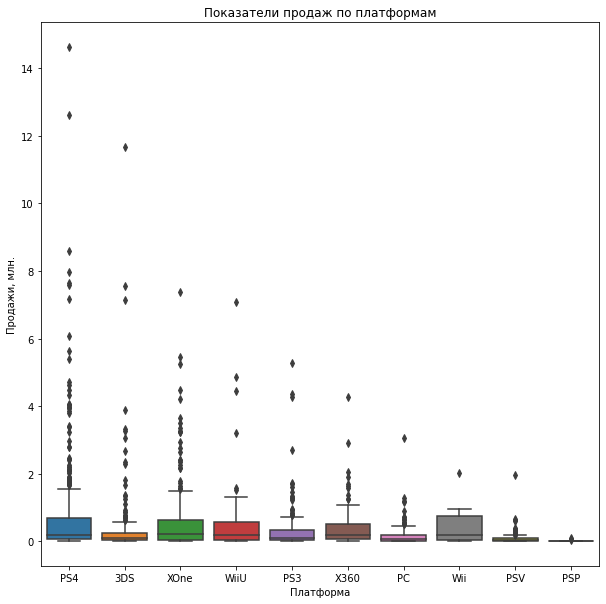

In [44]:
plt.figure(figsize = (10, 10))
sns.boxplot(y = 'all_sales', x = 'platform', data = games_info_target)
# в данных много выбросов, преимущественно в большую сторону. Некоторые игры продаются огромными тирражами
# при этом большинство имеют более скромную динамику продаж. Лучше прочих за 2012-2016 годы продавались игры на
# XOne и PS4 (что логично, платформы вышли на рынок только в 2013 году), а также игры на PS3 и X360 (предыдшествующее
# поколение наиболее успешных платформ)
plt.title('Показатели продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн.')
plt.show()

In [45]:
display(games_info_target.groupby('platform')['all_sales'].describe()) 
# в среднем каждая платформа имеет по полмиллиона продаж

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


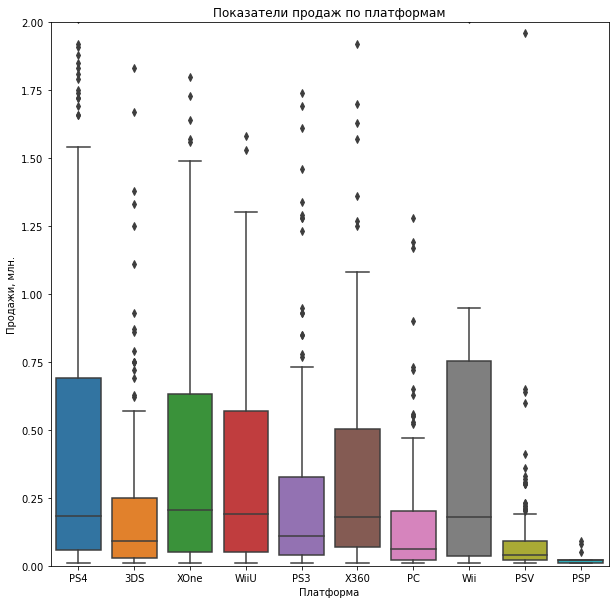

In [46]:
plt.figure(figsize = (10, 10))
sns.boxplot(y = 'all_sales', x = 'platform', data = games_info_target)
plt.ylim([0, 2])
plt.title('Показатели продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн.')
plt.show()

**Вывод:**
в данных много выбросов, все в большую сторону. Некоторые игры продаются огромными тирражами при этом большинство имеют значительно более скромную динамику продаж. Лучше прочих за 2014-2016 годы продавались игры на XOne, PS4 и 3DS в абсолютном выражении за три года. 

#### Посмотрим, как отзывы влияют на продажи на PS4

#### Продажи на платформах в зависимости от рейтингов критиков и игроков

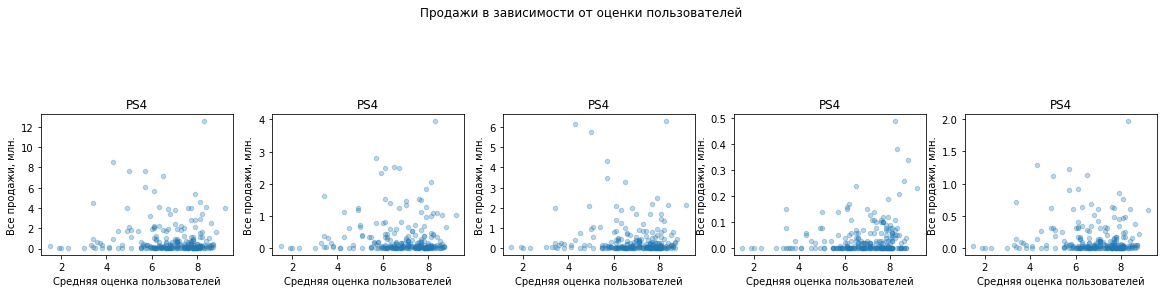

,all_sales,na_sales,eu_sales,jp_sales,other_sales,user_score
all_sales,1.000000,0.893513,0.952040,0.622182,0.998069,-0.040132
na_sales,0.893513,1.000000,0.715010,0.570745,0.916462,-0.016156
eu_sales,0.952040,0.715010,1.000000,0.544431,0.934892,-0.064199
jp_sales,0.622182,0.570745,0.544431,1.000000,0.601524,0.179384
other_sales,0.998069,0.916462,0.934892,0.601524,1.000000,-0.044166
user_score,-0.040132,-0.016156,-0.064199,0.179384,-0.044166,1.000000


In [47]:
fig = plt.figure()
region = ['all_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']
# заготовили названия столбцов, которые будем перебирать

subplt = 1
# подключаем счетчик для определения позиции графика

ps4_target_user_score = games_info_target[(games_info_target['user_score'] >= 0) &
                                          (games_info_target['platform'] == 'PS4')] \
[['all_sales', 'platform', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'user_score']]
# срезаем данные по платформе

# решение позаимствовано c turbopages: 
# https://translated.turbopages.org/proxy_u/en-ru.ru.c47897be-630b1436-ef42b454-74722d776562/https/stackoverflow.com/questions/70484827/calculating-pearson-correlation-using-python-loops
for r in region:
    ax = fig.add_subplot(5, 5, subplt)
    subplt += 1
    
    ps4_target_user_score.plot(x='user_score', y=r, kind='scatter', ax = ax, alpha=0.3, figsize = (20, 15))
    
    plt.suptitle('Продажи в зависимости от оценки пользователей')
    plt.title('PS4')
    plt.xlabel('Средняя оценка пользователей')
    plt.ylabel('Все продажи, млн.')

plt.show()

ps4_target_user_score.corr()

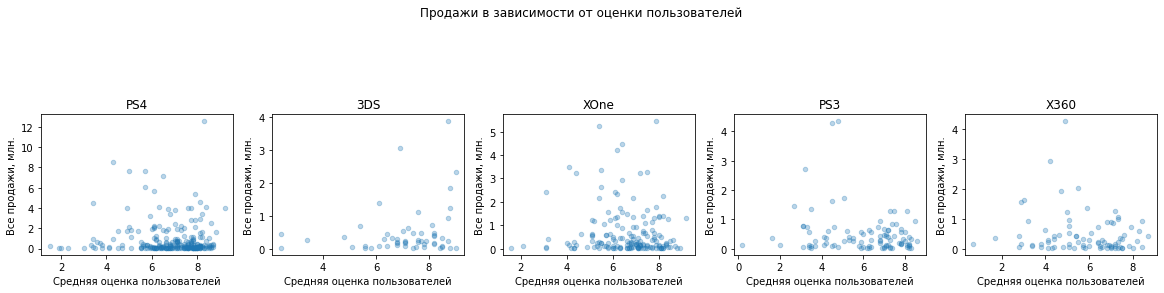

all_sales  user_score
platform                                  
3DS      all_sales    1.000000    0.215193
         user_score   0.215193    1.000000
PS3      all_sales    1.000000   -0.166761
         user_score  -0.166761    1.000000
PS4      all_sales    1.000000   -0.040132
         user_score  -0.040132    1.000000
X360     all_sales    1.000000   -0.138445
         user_score  -0.138445    1.000000
XOne     all_sales    1.000000   -0.070384
         user_score  -0.070384    1.000000

In [48]:
fig = plt.figure()
subplt = 1

top_platform = ['PS4', '3DS', 'XOne', 'PS3','X360']

games_info_target_user_score = games_info_target[games_info_target['user_score'] >= 0] \
[['all_sales', 'platform', 'user_score']]

for p in top_platform:
    ax = fig.add_subplot(5, 5, subplt)
    subplt += 1
    games_info_target_user_score_platform = games_info_target_user_score[
        games_info_target_user_score['platform'] == p
    ]
  
    games_info_target_user_score_platform.plot(
        x='user_score', y='all_sales', kind='scatter', 
        ax = ax, alpha=0.3, figsize = (20, 15)
    )
    
    plt.suptitle('Продажи в зависимости от оценки пользователей')
    plt.title(p)
    plt.xlabel('Средняя оценка пользователей')
    plt.ylabel('Все продажи, млн.')

plt.show()

# решение позаимствовано c turbopages: 
# https://translated.turbopages.org/proxy_u/en-ru.ru.c47897be-630b1436-ef42b454-74722d776562/https/stackoverflow.com/questions/70484827/calculating-pearson-correlation-using-python-loops

frame_platform = games_info_target_user_score.query('platform in @top_platform')
display(frame_platform.groupby('platform').corr())
        

**Вывод:** <a id='score_id'></a>

на графиках видно, что большинство игр с высоким рейтингом имеют невысокие продажи. При этом у игр с низким рейтингом продажи могут быть весьма внушительными. Взаимосвязи между оценками игроков и продажами не наблюдается.

Таким образом оценка пользователей не влияет на продажи игры, что подтверждается значениями корреляции между этими переменными на различных платформах, которые стремятся к 0 и большинстве случаев имеет отрицательное значение.

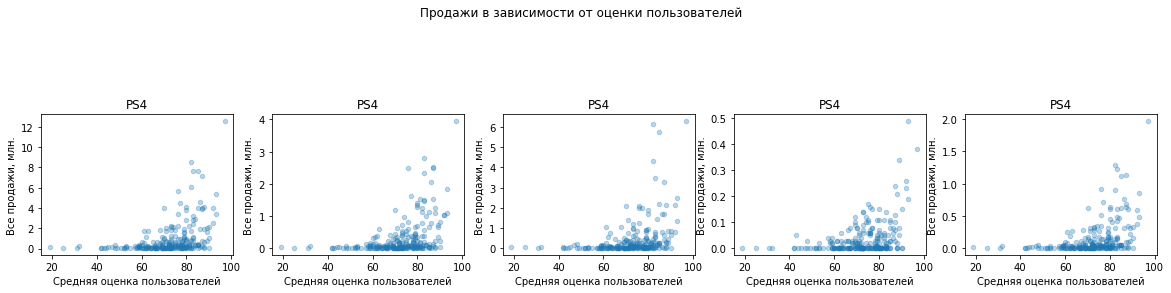

,all_sales,na_sales,eu_sales,jp_sales,other_sales,critic_score
all_sales,1.000000,0.892938,0.951882,0.619781,0.998058,0.402661
na_sales,0.892938,1.000000,0.713758,0.567900,0.916017,0.411638
eu_sales,0.951882,0.713758,1.000000,0.542153,0.934652,0.340268
jp_sales,0.619781,0.567900,0.542153,1.000000,0.598968,0.379041
other_sales,0.998058,0.916017,0.934652,0.598968,1.000000,0.404645
critic_score,0.402661,0.411638,0.340268,0.379041,0.404645,1.000000


In [49]:
fig = plt.figure()
region = ['all_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']
# заготовили названия столбцов, которые будем перебирать

subplt = 1
# подключаем счетчик для определения позиции графика

ps4_target_critic_score = games_info_target[(games_info_target['critic_score'] >= 0) &
                                          (games_info_target['platform'] == 'PS4')] \
[['all_sales', 'platform', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score']]
# срезаем данные по платформе
for r in region:
    ax = fig.add_subplot(5, 5, subplt)
    subplt += 1
    
    ps4_target_critic_score.plot(
        x='critic_score', y=r, kind='scatter', 
        ax = ax, alpha=0.3, figsize = (20, 15)
    )
    
    plt.suptitle('Продажи в зависимости от оценки пользователей')
    plt.title('PS4')
    plt.xlabel('Средняя оценка пользователей')
    plt.ylabel('Все продажи, млн.')

plt.show()

ps4_target_critic_score.corr()

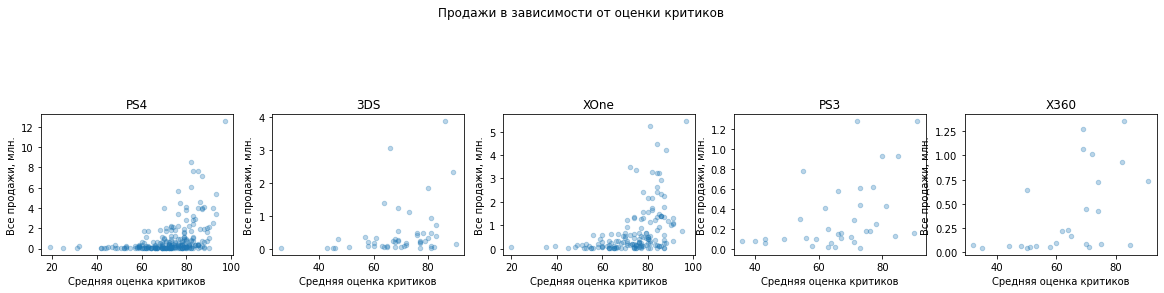

all_sales  critic_score
platform                                      
3DS      all_sales      1.000000      0.314117
         critic_score   0.314117      1.000000
PS3      all_sales      1.000000      0.446575
         critic_score   0.446575      1.000000
PS4      all_sales      1.000000      0.402661
         critic_score   0.402661      1.000000
X360     all_sales      1.000000      0.525723
         critic_score   0.525723      1.000000
XOne     all_sales      1.000000      0.428677
         critic_score   0.428677      1.000000

In [50]:
fig = plt.figure()
subplt = 1

top_platform = ['PS4', '3DS', 'XOne', 'PS3','X360']

games_info_target_critic_score = games_info_target[games_info_target['critic_score'] >= 0] \
[['all_sales', 'platform', 'critic_score']]

for p in top_platform:
    games_info_target_critic_score_platform = games_info_target_critic_score[
        games_info_target_critic_score['platform'] == p
    ]
    ax = fig.add_subplot(5, 5, subplt)
    subplt += 1
    
  
    games_info_target_critic_score_platform.plot(
        x='critic_score', y='all_sales', kind='scatter', 
        ax = ax, alpha=0.3, figsize = (20, 15)
    )
    
    plt.suptitle('Продажи в зависимости от оценки критиков')
    plt.title(p)
    plt.xlabel('Средняя оценка критиков')
    plt.ylabel('Все продажи, млн.')
    
    
plt.show()


frame_platform = games_info_target_critic_score.query('platform in @top_platform')
display(frame_platform.groupby('platform').corr())

**Вывод:**

на графиках видно, что высокие продажи наблюдаются у игр с высоким рейтингом критиков. Вместе игры с высоким рейтингом демонстрируют и низкие продажи. Кажется, что игры с высоким рейтингом критиков могут продаваться и хорошо и плохо, а вот с рейтингом ниже 60% скорее всего будут продаваться плохо. Наиболее ярко это выражено для платформ PS4 и XOne.

Данные коррелируют между собой, заметна умеренная корреляция. Значение корреляции находится в районе 0.5  Этот параметр можно использовать как дополнительный аргумент при планировании рекламной компании, но только на оценку критиков ориентироваться не стоит.

#### Посмотрим что с продажами игр по жанрам

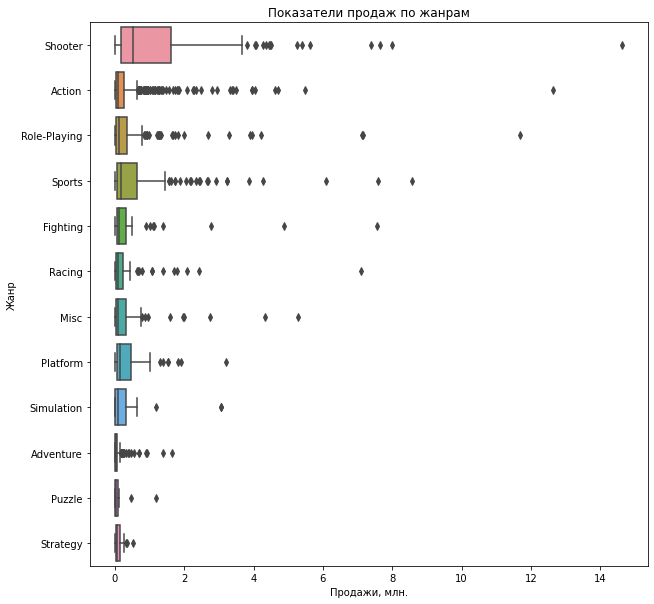

In [51]:
plt.figure(figsize = (10, 10))
sns.boxplot(y = 'genre', x = 'all_sales', data = games_info_target)

# в данных много выбросов, преимущественно в большую сторону. Некоторые игры продаются огромными тирражами
# при этом большинство имеют более скромную динамику продаж. Лучше прочих за 2012-2016 годы продавались игры на
# XOne и PS4 (что логично, платформы вышли на рынок только в 2013 году), а также игры на PS3 и X360 (предыдшествующее
# поколение наиболее успешных платформ)
plt.title('Показатели продаж по жанрам')
plt.xlabel('Продажи, млн.')
plt.ylabel('Жанр')
plt.show()

In [52]:
display(games_info_target.groupby('genre')['all_sales'].describe()) 

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,619.0,0.322068,0.798181,0.01,0.0300,0.090,0.2800,12.62
Adventure,185.0,0.094865,0.203147,0.01,0.0200,0.030,0.0800,1.66
Fighting,60.0,0.470333,1.188053,0.01,0.0600,0.125,0.3200,7.55
Misc,113.0,0.332301,0.736999,0.01,0.0300,0.090,0.3200,5.27
Platform,38.0,0.476053,0.722561,0.01,0.0625,0.140,0.4675,3.21
Puzzle,14.0,0.157857,0.320629,0.01,0.0200,0.045,0.1000,1.19
Racing,69.0,0.398841,0.963716,0.01,0.0300,0.090,0.2500,7.09
Role-Playing,221.0,0.459005,1.177284,0.01,0.0500,0.110,0.3600,11.68
Shooter,128.0,1.335469,2.050567,0.01,0.1725,0.515,1.6175,14.63


**Вывод:** 

наиболее высокие средние продажи наблюдаются в жанре Shooter. Данные игры продаются в среднем тиражом почти 1.5 млн. копий. В остальных жанрах игры в среднем продаются тиражом менее 1 млн. При этом в жанре самый высокий показателей выброса, более 14 млн. Единственный недостаток, в среднем игр этожа жанра выходит меньше. 

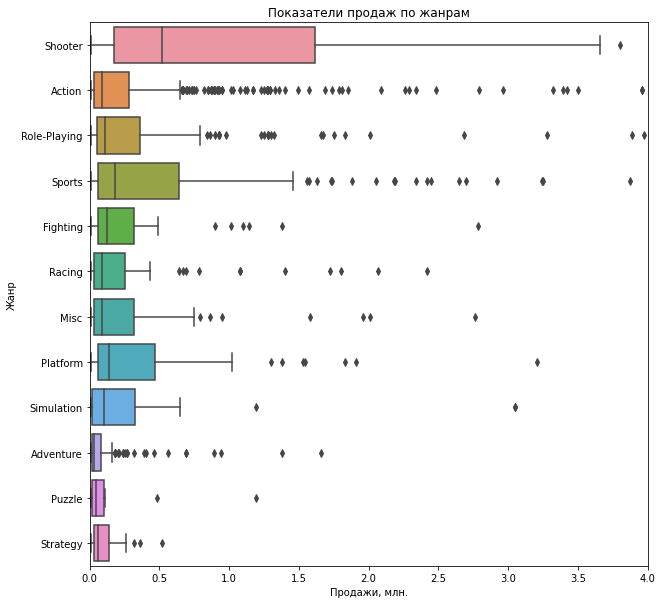

In [53]:
plt.figure(figsize = (10, 10))
sns.boxplot(y = 'genre', x = 'all_sales', data = games_info_target)
plt.xlim([0, 4])
plt.title('Показатели продаж по жанрам')
plt.xlabel('Продажи, млн.')
plt.ylabel('Жанр')
plt.show()

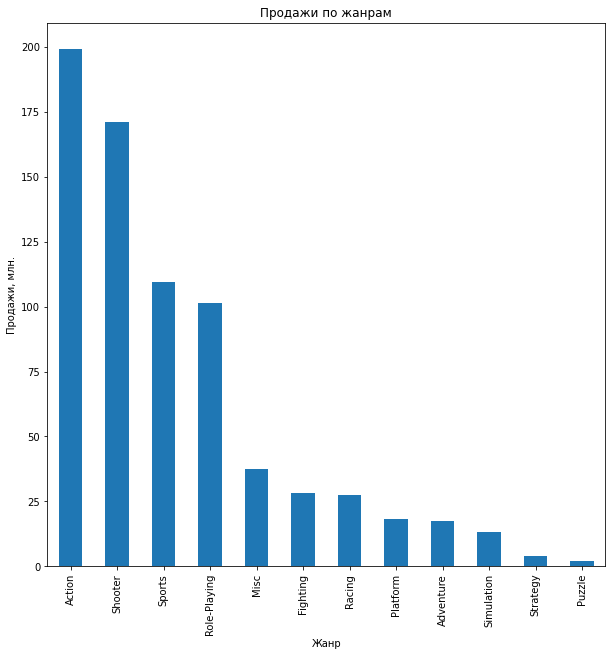

In [54]:
plt.figure(figsize = (10, 10))
sale_for_genre = games_info_target.groupby('genre')['all_sales'].sum().sort_values(ascending=False)
sale_for_genre.plot.bar()

plt.title('Продажи по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн.')
plt.show()

# в основном продажи формируются выбросами, играми - которые продаются значительно лучше среднестатистического продукта 

In [55]:
year_for_year = games_info_target.pivot_table(index='genre', values='all_sales', aggfunc='sum')

year_for_year['sales_2014'] = games_info_target[games_info_target['year_of_release']
                                  == 2014].pivot_table(index='genre', values='all_sales', aggfunc='sum') 
year_for_year['sales_2015'] = games_info_target[games_info_target['year_of_release']
                                  == 2015].pivot_table(index='genre', values='all_sales', aggfunc='sum') 
year_for_year['sales_2016'] = games_info_target[games_info_target['year_of_release']
                                  == 2016].pivot_table(index='genre', values='all_sales', aggfunc='sum') 


display(year_for_year)

,all_sales,sales_2014,sales_2015,sales_2016
genre,,,,
Action,199.36,97.23,72.02,30.11
Adventure,17.55,5.57,8.16,3.82
Fighting,28.22,15.85,7.90,4.47
Misc,37.55,23.38,11.57,2.60
Platform,18.09,8.81,6.05,3.23
Puzzle,2.21,1.49,0.71,0.01
Racing,27.52,16.66,8.07,2.79
Role-Playing,101.44,45.62,37.64,18.18
Shooter,170.94,65.21,67.51,38.22


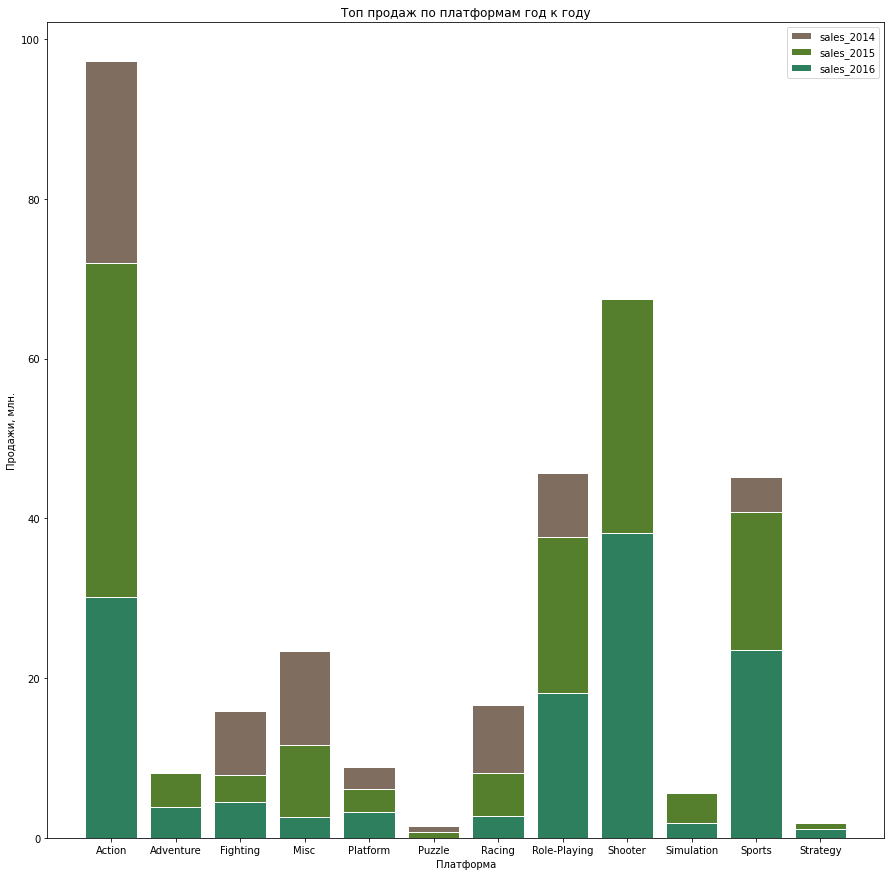

In [56]:
# решение позаимствовано тут https://www.python-graph-gallery.com/11-grouped-barplot

plt.figure(figsize = (15, 15))
plt.bar(year_for_year.index, year_for_year['sales_2014'], color='#7f6d5f', edgecolor='white', label='sales_2014')
plt.bar(year_for_year.index, year_for_year['sales_2015'], color='#557f2d', edgecolor='white', label='sales_2015')
plt.bar(year_for_year.index, year_for_year['sales_2016'], color='#2d7f5e', edgecolor='white', label='sales_2016')
plt.title('Топ продаж по платформам год к году')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн.')
plt.legend()
plt.show()

**Вывод:** <a id='sail_id'></a>

продажи во много формируются аномальными значениями выбросов. Похоже, что на рынок постоянно выходят видеоигры, которые продаются кратно лучше среднестатистической игры в этом же жанре.

При этом в любом случае лучше всего продаются игры в жанрах action, shooter и sport. Однако игры жанра action продаются большими тирражами лишь по причине большого разнообразия. На 619 игр этого жанра за 3 года приходится 128 игр жанра shooter и 161 игра жанра sport.

Лучшие средние показатели у жанра shooter, который в среднем продавался по 1.5 млн. копий, а лучшая игра была продана более 14 млн. раз. Однако данный жанр занимается лишь второе место по общим продажам, поскольку в данном жанре выходит значительно меньше игр, чем в лидирующем жанре action.

Также неплохо продаются ролевые игры. Средние продажи составляют чуть меньше 0.5 млн. копий на 221 игру за 3 года. 

Все прочие жанры либо продаются значительно хуже вышеуказанных жанров, либо выходит кратно меньшее количество игр подобного жанра, что также отражается на общих продажах.

Стоит отметить, что если взять данные только за 2016 год, то продажи игр в жанре shooter занимают первое место. Это кроме прочего свидетельствует о том, что игры жанра action за 3 года стали продаваться только хуже. Тауже согласно визуализации можно сделать вывод, что продажи игр жанра action в 2016 году составили лишь 1/3 от продаж за 2014 год.

#### Портрет пользователя по регионам

##### Посмотрим, какие платформы предпочитают покупатели

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.3
3,3DS,22.64
4,PS3,22.05
5,Other,31.19
,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54


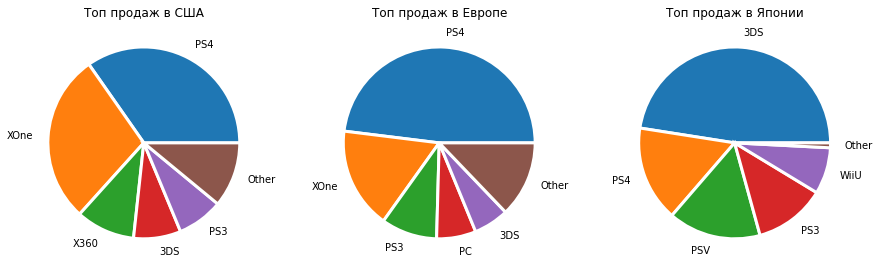

In [57]:
def region_sale_platform(region_sale):
#    q = 1
    sale_for_platform = []
    sale_for_platform_region = pd.DataFrame(columns=['platform', region_sale])
    for platform in pd.Series(games_info_target['platform'].unique()):
        x = games_info_target[games_info_target['platform'] == platform]
        sum_sale = x[region_sale].sum()
        sale_for_platform_region = sale_for_platform_region.append({region_sale : sum_sale, 
                                                                    'platform' : platform}, ignore_index=True)
# функция считает топы продаж по регионам и платформам
    sale_for_platform_region = sale_for_platform_region.sort_values(region_sale, ascending=False).reset_index(drop=True) 
    region_sale_other = sale_for_platform_region[region_sale].sum() - sale_for_platform_region[region_sale].head().sum()
    sale_for_platform_region = sale_for_platform_region.head()
    sale_for_platform_region = sale_for_platform_region.append({region_sale : region_sale_other, 
                                                                'platform' : 'Other'}, ignore_index=True)
    

    return sale_for_platform_region

display_side_by_side(region_sale_platform('na_sales'), region_sale_platform('eu_sales'), region_sale_platform('jp_sales'), 
                     titles=['США', 'Европа', 'Япония'])

plt.figure(figsize=(15, 15))
plt.subplot(3, 3, 1)
plt.pie(region_sale_platform('na_sales')['na_sales'],
    labels=region_sale_platform('na_sales')['platform'],
    labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });
plt.title('Топ продаж в США')

plt.subplot(3, 3, 2)
plt.pie(region_sale_platform('eu_sales')['eu_sales'],
    labels=region_sale_platform('eu_sales')['platform'],
    labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });
plt.title('Топ продаж в Европе')

plt.subplot(3, 3, 3)
plt.pie(region_sale_platform('jp_sales')['jp_sales'],
    labels=region_sale_platform('jp_sales')['platform'],
    labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });
plt.title('Топ продаж в Японии')
plt.show()


**Вывод:**<a id='jap_id'></a>

предпочтения у игроков из разных регионов разнятся. При этом продажи в США и Европе существенно превышают суммарные продажи в Японии.

Покупатели в Японии предпочитают видеоигры на PS и портативных консолях. 

В то же время европейцы отдают предпочтения стационарным платформам, вследствии чего в топ-5 попал PC. Продукция XB и PS примерно в равном соотношении занимает подавляющую часть рынка. 

Схожая ситуация наблюдается и в США, где продукция XB и PS примерно в равном соотношении занимает подавляющую часть рынка. Однако там также популярны и игры на портативных консолях, ввиду чего в топ попала WiiU.

##### Посмотрим, какие жанры предпочитают в разных регионах

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05
5,Other,37.86
,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73


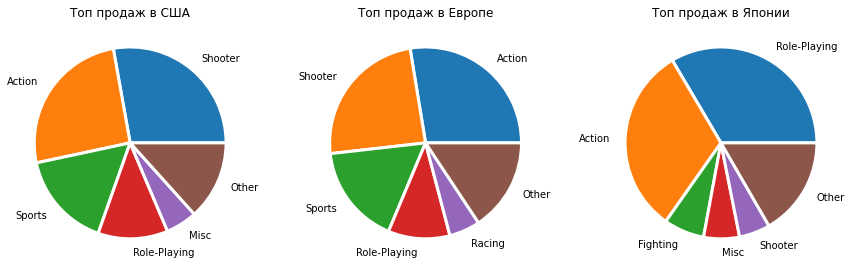

In [58]:
def region_sale_genre(region_sale):
    sale_for_genre = []
    sale_for_genre_region = pd.DataFrame(columns=['genre', region_sale])
    for genre in pd.Series(games_info_target['genre'].unique()):
        x = games_info_target[games_info_target['genre'] == genre]
        sum_sale = x[region_sale].sum()
        sale_for_genre_region = sale_for_genre_region.append({region_sale : sum_sale, 'genre' : genre}, ignore_index=True)

    # функция считает топы продаж по регионам и платформам

    sale_for_genre_region = sale_for_genre_region.sort_values(region_sale, ascending=False).reset_index(drop=True) 
    region_sale_other_genre = sale_for_genre_region[region_sale].sum() - sale_for_genre_region[region_sale].head().sum()
    sale_for_genre_region = sale_for_genre_region.head()
    sale_for_genre_region = sale_for_genre_region.append({region_sale : region_sale_other_genre, 
                                                                'genre' : 'Other'}, ignore_index=True)
       
    return sale_for_genre_region


display_side_by_side(region_sale_genre('na_sales'), region_sale_genre('eu_sales'), region_sale_genre('jp_sales'), 
                     titles=['США', 'Европа', 'Япония'])

plt.figure(figsize=(15, 15))
plt.subplot(3, 3, 1)
plt.pie(region_sale_genre('na_sales')['na_sales'],
    labels=region_sale_genre('na_sales')['genre'],
    labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });
plt.title('Топ продаж в США')

plt.subplot(3, 3, 2)
plt.pie(region_sale_genre('eu_sales')['eu_sales'],
    labels=region_sale_genre('eu_sales')['genre'],
    labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });
plt.title('Топ продаж в Европе')

plt.subplot(3, 3, 3)
plt.pie(region_sale_genre('jp_sales')['jp_sales'],
    labels=region_sale_genre('jp_sales')['genre'],
    labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });
plt.title('Топ продаж в Японии')
plt.show()


**Вывод:**<a id='region_id'></a>

в США, Европе и Японии предпочитают видеоигры в жанре action. При этом первые две позиции топ-5 составляют более 50% от всех продаж в каждом из регионов.

Лучше всего видеоигры продаются в США и Европе. В Японии продажи кратно меньше.

Также в глаза бросается схожесть жанровых предпочтений США и Европы. Единственное отличие - пятое место. 

При этом существенно отличаются продажи в Японии. Первое место по продажам занимают ролевые игры, в то время как шутеры только на пятом месте. Вероятно это связано с тем, что в Японии большую часть игр покупают на 3DS.

##### Посмотрим на влияние рейтинга ESRB

,rating,na_sales
0,M,96.42
1,NA,64.72
2,E,50.74
3,T,38.95
4,E10+,33.23
,rating,eu_sales
0,M,93.44
1,NA,58.95
2,E,58.06
3,T,34.07


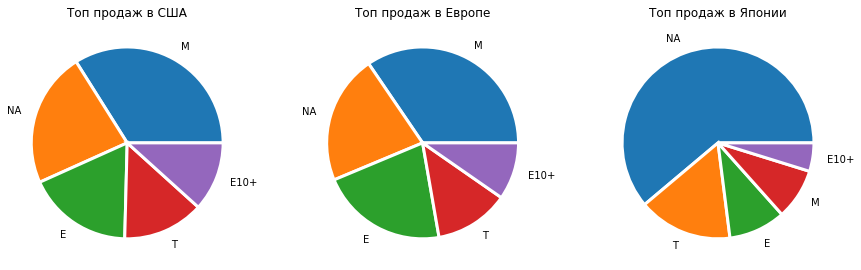

In [59]:
def region_sale_rating(region_sale):
    sale_for_rating = []
    sale_for_rating_region = pd.DataFrame(columns=['rating', region_sale])
    for rating in pd.Series(games_info_target['rating'].unique()):
        x = games_info_target[games_info_target['rating'] == rating]
        sum_sale = x[region_sale].sum()
        sale_for_rating_region = sale_for_rating_region.append({region_sale : sum_sale, 
                                                                'rating' : rating}, ignore_index=True)

    sale_for_rating_region = sale_for_rating_region.sort_values(region_sale, 
                                                                       ascending=False).reset_index(drop=True)    
    return sale_for_rating_region


display_side_by_side(region_sale_rating('na_sales'), region_sale_rating('eu_sales'), region_sale_rating('jp_sales'), 
                     titles=['США', 'Европа', 'Япония'])

plt.figure(figsize=(15, 15))
plt.subplot(3, 3, 1)
plt.pie(region_sale_rating('na_sales')['na_sales'],
    labels=region_sale_rating('na_sales')['rating'],
    labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });
plt.title('Топ продаж в США')

plt.subplot(3, 3, 2)
plt.pie(region_sale_rating('eu_sales')['eu_sales'],
    labels=region_sale_rating('eu_sales')['rating'],
    labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });
plt.title('Топ продаж в Европе')

plt.subplot(3, 3, 3)
plt.pie(region_sale_rating('jp_sales')['jp_sales'],
    labels=region_sale_rating('jp_sales')['rating'],
    labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });
plt.title('Топ продаж в Японии')
plt.show()

**Вывод:** <a id='rating_id'></a>

продажи игр действительно рознятся в зависимости от рейтинга. Европейцы и американцы предпочитают видеоигры для взрослых. При этом второе место занимают игры без рейтинга. 

Опять же выделяется Япония, где рейтинг не имеет ярковыраженного влияния на предпочтения покупателей. При этом во всех странах наименее популярны игры для детей от 10 лет и старше.

### Пора проверить пару гипотез

#### Проверка гипотезы: пользовательские рейтинги на платформах PC и XOne равны

**H_0::** оценка пользователей 'user_score' на платформе 'PC' = оценке пользователей 'user_score' на платформе 'XOne' 

**H_1:** оценка пользователей 'user_score' на платформе 'PC' ≠ оценке пользователей 'user_score' на платформе 'XOne' 

In [60]:
alpha = .05 
# критический уровень статистической значимости в 5%. Для пользовательского рейтинга по 10 бальной шкале кажется разумным

sample_1 = games_info_target[games_info_target['platform'] == 'PC']
sample_2 = games_info_target[games_info_target['platform'] == 'XOne']

results = st.ttest_ind(
    sample_1['user_score'], 
    sample_2['user_score']
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.23987029612974073
Не получилось отвергнуть нулевую гипотезу


In [61]:
print('Средний пользовательский рейтинг на PC:', sample_1['user_score'].mean())
print('Средний пользовательский рейтинг на XOne:', sample_2['user_score'].mean())

Средний пользовательский рейтинг на PC: 4.73774834437086
Средний пользовательский рейтинг на XOne: 4.267982456140351


**Вывод:**

p-значение оказалось dsit 20%, отвергнуть нулевую гипотезу не удалось.

Нулевой гипотезой выбрана гипотеза о равенстве двух генеральных совокупностей. Альтернативная гипотеза выбрана так, чтобы охватыватить вероятностное пранство за рамками нулевой гипотезы. Критический уровень статистической значимости выбран исходя из принципов разумности и сложившейся практики.

#### Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports разные

**H_0::** оценка пользователей 'user_score' жанра 'Action' = оценке пользователей 'user_score' жанра 'Sports' 

**H_1:** оценка пользователей 'user_score' жанра 'Action' ≠ оценке пользователей 'user_score' жанра 'Sports'


In [62]:
beta = .05 
# критический уровень статистической значимости в 5%. Для пользовательского рейтинга по 10 бальной шкале кажется разумным

sample_3 = games_info_target[games_info_target['genre'] == 'Action']
sample_4 = games_info_target[games_info_target['genre'] == 'Sports']

results_1 = st.ttest_ind(
    sample_3['user_score'], 
    sample_4['user_score']
)

print('p-значение:', results_1.pvalue)

if results_1.pvalue < beta:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 6.90952564373461e-05
Отвергаем нулевую гипотезу


In [63]:
print('Средний пользовательский рейтинг жанра Action:', sample_3['user_score'].mean())
print('Средний пользовательский рейтинг жанра Sports:', sample_4['user_score'].mean())

Средний пользовательский рейтинг жанра Action: 2.268012924071079
Средний пользовательский рейтинг жанра Sports: 3.7614906832298125


**Вывод:**

нулевой гипотезой выбрана гипотеза о равенстве двух генеральных совокупностей, при этом p-значение стремится к нулю, данное значение весьма незначительно. Ввиду этого можно предположить, что более вероятно подтверждение альтернативной гипотезы, охватывающий вероятностное пространство за рамками нулевой гипотезы.

То есть рейтинги жанров action и sport действительно разные.

### Проверим гипотезу о том, что наиболее перспективными в контексте продаж выглядят жанры Shooter и Sports с рейтингом 'M' на платформах PS4 и XOne для продажи на территории США и Европы

**H_0::** продажи жанров Shooter и Sports с рейтингом 'M' на платформах PS4 и XOne на территории США и Европы = средним продажам

**H_1:** продажи жанров Shooter и Sports с рейтингом 'M' на платформах PS4 и XOne на территории США и Европы > средних продаж

In [64]:
interested_value = games_info_target['all_sales'].mean()
frame_1 = ['Shooter', 'Sports']
frame_2 = ['PS4', 'XOne']

revenue = games_info_target.query('genre in @frame_1 and platform in @frame_2 and rating == "M"')
revenue = revenue['na_sales'] + revenue['eu_sales']

alpha = .05 
print('Средний уровень продаж игр по всему миру:', interested_value, 'млн.')
print('Средний уровень продаж игр жанра Shooter и Sports с рейтингом M на платформах PS4 и XOne на территории США и Европы:',
     revenue.mean(), 'млн. \n')

results =  st.ttest_1samp(
    revenue, 
    interested_value)

print('p-значение:', results.pvalue / 2)

if ((results.pvalue / 2 < alpha) and (revenue.mean() > interested_value)
   
   ):
    print("Отвергаем нулевую гипотезу: продажи по срезу выше средних показателей продаж по всему миру")
else:
    print("Не получилось отвергнуть нулевую гипотезу: срез по продажам достигает средних показателей по продажам в мире")

Средний уровень продаж игр по всему миру: 0.43188277087033045 млн.
Средний уровень продаж игр жанра Shooter и Sports с рейтингом M на платформах PS4 и XOne на территории США и Европы: 1.3950000000000005 млн. 

p-значение: 3.7466552379425366e-05
Отвергаем нулевую гипотезу: продажи по срезу выше средних показателей продаж по всему миру


**Вывод:**<a id='perspective'></a>

продажи жанров Shooter и Sports с рейтингом 'M' на платформах PS4 и XOne для продажи на территории США и Европы выглядят перспективно.

### Проверим гипотезу о том, что продажи жанра Role-Playing на платформе 3DS на территории Японии не ниже средних продаж по миру

**H_0::** продажи жанра Role-Playing на платформе 3DS на территории Японии = средним продажам

**H_1:** продажи жанра Role-Playing на платформе 3DS на территории Японии < средних продаж

In [65]:
interested_value = games_info_target['all_sales'].mean()
frame_1 = ['Role-Playing', '3DS']
revenue = games_info_target.query('genre in @frame_1 and platform in @frame_1 and rating == "NA"')
revenue = revenue['jp_sales']

alpha = .05 
print('Средний уровень продаж игр по всему миру:', interested_value, 'млн.')
print('Средний уровень продаж игр жанра жанра Role-Playing на платформе 3DS на территории Японии:', revenue.mean(), 'млн. \n')
results =  st.ttest_1samp(
    revenue, 
    interested_value)

print('p-значение:', results.pvalue / 2)

if ((results.pvalue / 2 < alpha) and (revenue.mean() < interested_value)
   
   ):
    print("Отвергаем нулевую гипотезу: продажи по срезу ниже средних показателей продаж по всему миру")
else:
    print("Не получилось отвергнуть нулевую гипотезу: срез по продажам достигает средних показателей по продажам в мире")

Средний уровень продаж игр по всему миру: 0.43188277087033045 млн.
Средний уровень продаж игр жанра жанра Role-Playing на платформе 3DS на территории Японии: 0.5271428571428569 млн. 

p-значение: 0.30488682072589535
Не получилось отвергнуть нулевую гипотезу: срез по продажам достигает средних показателей по продажам в мире


**Вывод:**<a id='jp_orient'></a>

в случае ориентации в продажах на рынок Японии необходимо ориентироваться на жанр Role-Playing на платформе 3DS. Продажи подобных игр сравнимы со средними продажами по всему миру.

### Общий вывод:

1) Согласно представленным данным [продажи по всему миру падают](#section_id) с 2008 года. С 2014 года наблюдается подение почти в 2 раза год к году. При этом количество выпускаемых игр год к году не падает. Высока вероятность, что данная тенденция сохранится и продажи в 2017 году не превысят 50 млн. копий по всему миру. Ввиду этого продажи могут упасть вне зависимости от того, насколько удачно будет выбрана категория товара.


2) Рынок Японии значительно меньше рынка США и Европы, а кроме того отличается от него структурно. Если на рынках США и Европы в большинстве своем [покупают](#jap_id) игры на стационарных платформах производства SonyPlayStacion и XBox, то в Японии предпочитают портативные приставки и продукцию SonyPlayStacion. 

3) Оценки пользователей или критиков [не оказывают существенного влияния](#score_id) на продажи. Однако оценку критиков можно использовать как дополнительный аргумент при прогнозировании продаж.


4) [Возрастной рейтинг](#rating_id) играет роль при осуществлении продаж в Европе или США. Местные покупатели предпочитают игры для взрослых с рейтингом 'M'. Второе место по продажам занимают игры, которым не присвоен рейтинг. При этом в Японии данный рейтинг не оказывает существенного влияния на продажи, чаще всего продаются игры, которым он не присвоен. При этом во всех регионах хуже всего продаются игры срейтингом для детей старше 10 лет (E10+).


5) Среднее время поддержки игровой платформы [составляет 11 лет](#year_id). В течении этого времени на ней выходят  и продаются игры. При этом игровые платформы X360 и PS3 находятся на рынке [более 10 лет](#time_id), что повышает риск прекращения выпуска игр на данных платформах в 2017 году. Исходя из этого наиболее перспективна в контексте продаж является PS4, продажи на которой [существенно опережают](#jap_id) продажи на конкурирующих платформах. Стоит отметить, что хорошие продажи показывает XOne. При этом выделяется Япония, где лучше прочих продаются игра на 3DS.


6) Среди жанров [наиболее перспективно](#sail_id) в конексте продаж выглядят жанры Shooter и Sports. Они показывают наибольшие продажи во всех регионах.Опять же отличается [структура продаж в Японии](#region_id), там лучше всего продаются игры жанра Role-Playing.


Суммируя вышесказанное, продажи в 2017 году скорее всего упадут в любом случае. [Перспективными в контексте продаж](#perspective) выглядят жанры Shooter и Sports с рейтингом 'M' на платформах PS4 и XOne для продажи на территории США и Европы. При необходимости, в качестве дополнительного критерия можно использовать рейтинг критиков, которые должен быть выше 60%.

При этом рынок Японии довольно своеобразен, а по объему существенно меньше европейского и североамериканского. [В случае ориентации на него](#jp_orient), стоит ориентироваться на жанр Role-Playing на платформе 3DS, без привязки к рейтингу.
